In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import glob
import re
import platform
import importlib
import netCDF4
import multiprocessing as mp
import itertools

base_FP = f'/home/subin/data'
cpuserver_data_FP = f'/home/subin/cpuserver_data'
print(base_FP, cpuserver_data_FP)
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.HLS as hHLS
import HydroAI.Plot as hPlot
import HydroAI.Data as hData
import HydroAI.Grid as hGrid
importlib.reload(hHLS);
importlib.reload(hPlot);
importlib.reload(hData);
importlib.reload(hGrid);

/home/subin/data /home/subin/cpuserver_data


/home/subin/miniconda3/envs/cuml_env/lib/python3.10/site-packages/optuna/study/_optimize.py:20: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


['latitude', 'longitude', 'dates', 'coastal', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'cirrus', 'tir1', 'tir2', 'qa']
['coastal', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'cirrus', 'tir1', 'tir2', 'qa']


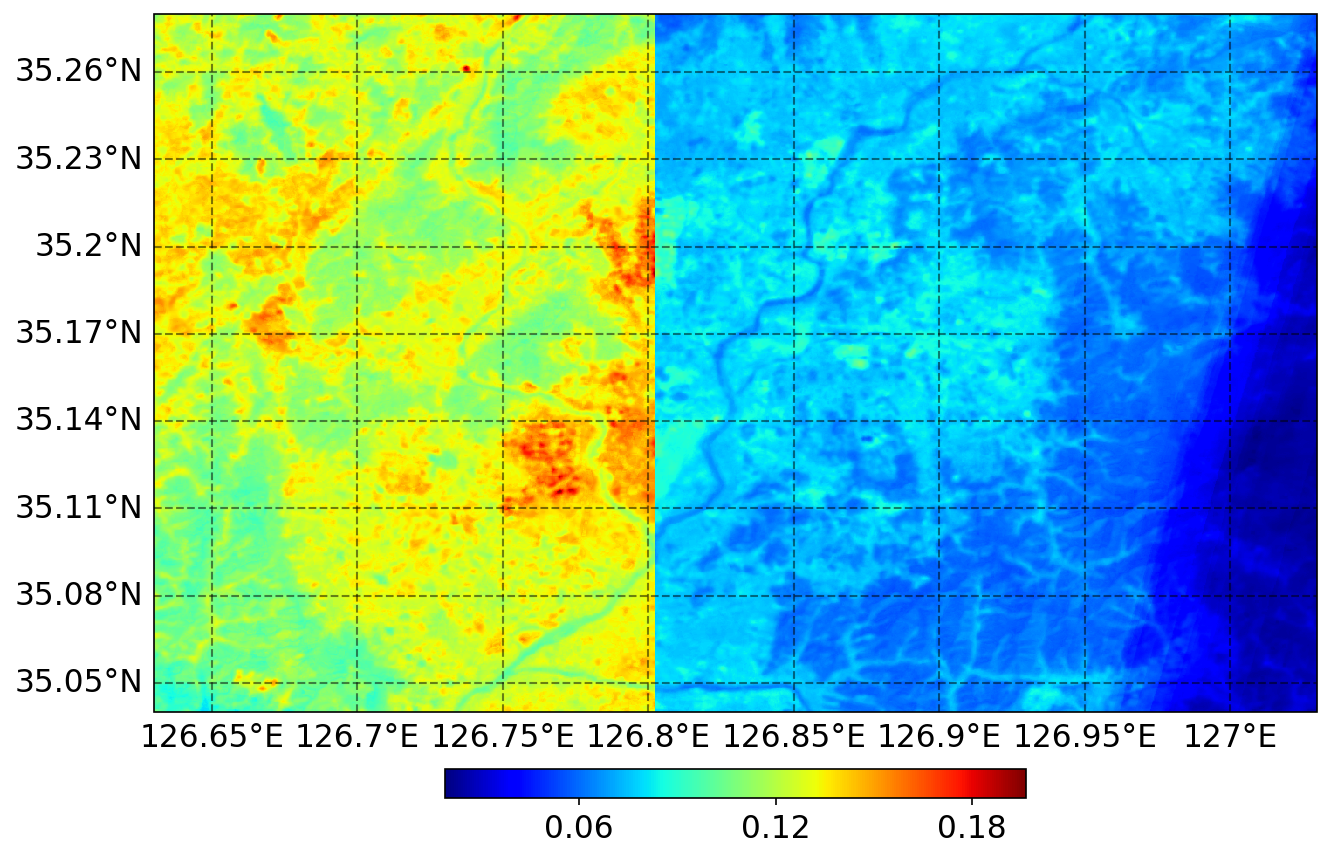

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [2]:
start_year = 2024; end_year = 2024

temp_path = f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/HLS_2022_GJ.nc'
with netCDF4.Dataset(temp_path) as nc_data:
    vars_list = list(nc_data.variables.keys())
    temp_red = nc_data.variables['tir1'][:].data
    nc_lat = nc_data.variables['latitude'][:].data
    nc_lon = nc_data.variables['longitude'][:].data
    
print(vars_list)
remove_vars = ['latitude', 'longitude', 'dates']
vars_list = [i for i in vars_list if i not in remove_vars]
print(vars_list)

target = np.nanmean(temp_red, axis=2)
hPlot.plot_map(nc_lon, nc_lat, target, np.nanmin(target), np.nanmax(target), label_title=f'', projection='PlateCarree')

In [7]:
for i, year in enumerate(range(start_year, end_year + 1)):

    with netCDF4.Dataset(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/HLS_{year}_GJ.nc') as nc_data:
        nc_lat = nc_data.variables['latitude'][:].data
        nc_lon = nc_data.variables['longitude'][:].data
        nc_dates = nc_data.variables['dates'][:].data

        for date_idx, date in enumerate(nc_dates):
            df_year = pd.DataFrame()
            df_year['latitude'] = nc_lat.flatten()
            df_year['longitude'] = nc_lon.flatten()
            df_year['dates'] = date

            for var_name in vars_list:     
                nc_var = nc_data.variables[var_name][:, :, date_idx].data
                df_year[var_name] = nc_var.flatten()

            if date_idx != 0:
                df_year = pd.concat([df_year_old, df_year], axis=0)

            df_year_old = df_year

    df_year = df_year.dropna(axis=0)

    print(year, np.shape(df_year))
    
    df_year.to_csv(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/HLS_{year}_GJ.csv', sep=',')
    
    del df_year_old
    del df_year

2024 (77297737, 14)


In [8]:
nc_dates

array([20240102, 20240103, 20240104, 20240110, 20240111, 20240112,
       20240118, 20240119, 20240126, 20240127, 20240128, 20240203,
       20240204, 20240211, 20240212, 20240213, 20240219, 20240227,
       20240228, 20240306, 20240307, 20240308, 20240314, 20240315,
       20240316, 20240322, 20240323, 20240324, 20240330, 20240331,
       20240401, 20240407, 20240408, 20240409, 20240416, 20240417,
       20240423, 20240424, 20240425, 20240501, 20240502, 20240503,
       20240509, 20240510, 20240511, 20240517, 20240518, 20240519,
       20240525, 20240526, 20240527, 20240602, 20240603, 20240604,
       20240610, 20240611, 20240612, 20240618, 20240619, 20240620,
       20240626, 20240627, 20240628, 20240704, 20240705, 20240706,
       20240712, 20240713, 20240720, 20240721, 20240722, 20240728,
       20240729, 20240730, 20240805, 20240806, 20240807, 20240813,
       20240814, 20240815, 20240821, 20240822, 20240823, 20240829,
       20240830, 20240831, 20240906, 20240907, 20240908, 20240

In [ ]:
#df_year_total.to_csv(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/HLS_2015_2023_GJ.csv', sep=',')